## CDC PLACES data analysis project
*  Mala Chaurasia



### Introduction to CDC PLACES dataset


In [ ]:
!pip install addfips

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 1.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import sys
import warnings
warnings.filterwarnings("ignore")
import logging
import addfips
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

### Income data downloaded from Wiki.
* https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income
* using the online Wiki table converter, which takes URL and converts tables in CSV for download.

In [ ]:
income=pd.read_csv('/content/List_of_United_States_counties_by_per_capita_income_1.csv')

In [ ]:
income.head()

,Rank,County or \ncounty-equivalent,"State,\n federal district\n or territory",Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome,Population,Number of\nhouseholds
0,1,New York County,New York,"$76,592","$69,659","$86,553","1,628,706","759,460"
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454"
2,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857","12,731","5,020"
3,4,Marin,California,"$56,791","$90,839","$117,357","254,643","102,912"
4,5,Santa Clara,California,"$56,248","$124,055","$124,055","1,927,852","640,215"


In [ ]:
income.columns

Index(['Rank', 'County or \ncounty-equivalent',
       'State,\n federal district\n or territory', 'Per capita\nincome',
       'Median\nhousehold\nincome', 'Median\nfamily\nincome', 'Population',
       'Number of\nhouseholds'],
      dtype='object')

In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Rank                                    3297 non-null   object
 1   County or 
county-equivalent            3297 non-null   object
 2   State,
 federal district
 or territory  3297 non-null   object
 3   Per capita
income                       3297 non-null   object
 4   Median
household
income                 3288 non-null   object
 5   Median
family
income                    3288 non-null   object
 6   Population                              3288 non-null   object
 7   Number of
households                    3288 non-null   object
dtypes: object(8)
memory usage: 206.2+ KB


In [ ]:
income[['County or \ncounty-equivalent', 'State,\n federal district\n or territory']].value_counts(dropna=False)

County or \ncounty-equivalent  State,\n federal district\n or territory
Guam                           Guam                                        2
10th Percentile                10th Percentile                             1
Nowata                         Oklahoma                                    1
Northampton                    North Carolina                              1
                               Pennsylvania                                1
                                                                          ..
Glynn                          Georgia                                     1
Gogebic                        Michigan                                    1
Golden Valley                  Montana                                     1
                               North Dakota                                1
Ziebach                        South Dakota                                1
Name: count, Length: 3296, dtype: int64

In [ ]:
# Adding fips code to income data and combine it with PLACES
# code from https://towardsdatascience.com/breaking-down-the-cdcs-500-cities-health-metrics-data-set-code-included-625ed534088e

fips_codes=[]
index=0
for i in range(income.shape[0]):
  add_fips=addfips.AddFIPS()
  fip_code=add_fips.get_county_fips(county= income['County or \ncounty-equivalent'][i], state= income['State,\n federal district\n or territory'][i])
  fips_codes.append(fip_code)

income['CountyFIPS']=fips_codes



In [ ]:
# Removing nulls as its causing eoors in merging with places dataset.

drp_index=income[income['Median\nhousehold\nincome'].isna()].index
income=income.drop(index=drp_index, axis=0)

In [ ]:
income.CountyFIPS.info()

<class 'pandas.core.series.Series'>
Index: 3288 entries, 0 to 3296
Series name: CountyFIPS
Non-Null Count  Dtype 
--------------  ----- 
3232 non-null   object
dtypes: object(1)
memory usage: 51.4+ KB


In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288 entries, 0 to 3296
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Rank                                    3288 non-null   object
 1   County or 
county-equivalent            3288 non-null   object
 2   State,
 federal district
 or territory  3288 non-null   object
 3   Per capita
income                       3288 non-null   object
 4   Median
household
income                 3288 non-null   object
 5   Median
family
income                    3288 non-null   object
 6   Population                              3288 non-null   object
 7   Number of
households                    3288 non-null   object
 8   CountyFIPS                              3232 non-null   object
dtypes: object(9)
memory usage: 256.9+ KB


In [ ]:
income.CountyFIPS.nunique()

3225

# Income dataset


* The income dataset has 3232 unique fips codes.
* It comprises of states, counties, median family income, median household income and per capita income. For our purposes we will use per-capita income. Which is income per person irrespective of age/job status.

# PLACES dataset

In [71]:
# Importing the places dataset
places=pd.read_csv('/content/PLACES__Local_Data_for_Better_Health__Census_Tract_Data_2023_release_20240509.csv')

In [72]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555113 entries, 0 to 2555112
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Year                        int64  
 1   StateAbbr                   object 
 2   StateDesc                   object 
 3   CountyName                  object 
 4   CountyFIPS                  int64  
 5   LocationName                int64  
 6   DataSource                  object 
 7   Category                    object 
 8   Measure                     object 
 9   Data_Value_Unit             object 
 10  Data_Value_Type             object 
 11  Data_Value                  float64
 12  Data_Value_Footnote_Symbol  float64
 13  Data_Value_Footnote         float64
 14  Low_Confidence_Limit        float64
 15  High_Confidence_Limit       float64
 16  TotalPopulation             int64  
 17  Geolocation                 object 
 18  LocationID                  int64  
 19  CategoryID           

In [ ]:
places.head(3)

,Year,StateAbbr,StateDesc,CountyName,CountyFIPS,LocationName,DataSource,Category,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Geolocation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text
0,2021,AL,Alabama,Baldwin,1003,1003011300,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,...,NaN,29.8,40.9,4487,POINT (-87.87730464 30.43411562),1.003011e+09,HLTHOUT,OBESITY,CrdPrv,Obesity
1,2021,AL,Alabama,Chambers,1017,1017954000,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,...,NaN,38.0,54.3,6669,POINT (-85.46010298 32.86128629),1.017954e+09,HLTHOUT,OBESITY,CrdPrv,Obesity
2,2021,AL,Alabama,Cleburne,1029,1029959600,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,...,NaN,31.0,47.8,4202,POINT (-85.56228862 33.69258271),1.029960e+09,HLTHOUT,OBESITY,CrdPrv,Obesity


# Dataset description

23 columns, 2.5M plus records.

We will be using only 1 state, county, category, location, measure identifier to reudce duplicate information.

The total Population will be considered from this dataset. Only income data from Income will be used for analysis.

We will be combining PLACES and Income dataset using FIPS code. Hence the FIPS column created in income dataset name is given the same.

In [ ]:
places[['StateAbbr', 'StateDesc', 'LocationName', 'CountyFIPS']].head()

,StateAbbr,StateDesc,LocationName,CountyFIPS
0,AL,Alabama,1003011300,1003
1,AL,Alabama,1017954000,1017
2,AL,Alabama,1029959600,1029
3,AL,Alabama,1039962000,1039
4,AL,Alabama,1057020400,1057


In [ ]:
places.DataSource.value_counts()

DataSource
BRFSS    544129
Name: count, dtype: int64

In [ ]:
places.Category.value_counts()

Category
Health Outcomes          185782
Prevention               158746
Disability                98269
Health Risk Behaviors     59219
Health Status             42113
Name: count, dtype: int64

In [ ]:
places.Data_Value.value_counts()

Data_Value
2.7     2719
2.9     2696
2.8     2651
2.6     2627
3.0     2622
        ... 
95.8       1
96.5       1
97.0       1
94.7       1
97.6       1
Name: count, Length: 967, dtype: int64

In [ ]:
places.Data_Value_Footnote.value_counts(dropna=False)

Data_Value_Footnote
NaN    544129
Name: count, dtype: int64

In [ ]:
places.TotalPopulation.value_counts(dropna=False)

TotalPopulation
4795     444
4352     407
3954     371
3412     353
3152     349
        ... 
6185       1
1715       1
11512      1
1381       1
8914       1
Name: count, Length: 6728, dtype: int64

In [ ]:
places.LocationID.value_counts(dropna=False)

LocationID
1.003011e+09    37
6.073005e+09    37
6.073006e+09    37
6.071010e+09    37
6.071002e+09    37
                ..
2.303103e+10     1
1.209900e+10     1
1.209502e+10     1
1.210501e+10     1
NaN              1
Name: count, Length: 18544, dtype: int64

In [ ]:
places[['CategoryID', 'Category']].value_counts(dropna=False)

CategoryID  Category             
HLTHOUT     Health Outcomes          185782
PREVENT     Prevention               158745
DISABLT     Disability                98269
RISKBEH     Health Risk Behaviors     59219
HLTHSTAT    Health Status             42113
NaN         Prevention                    1
Name: count, dtype: int64

In [ ]:
places[['LocationName','LocationID']]

,LocationName,LocationID
0,1003011300,1.003011e+09
1,1017954000,1.017954e+09
2,1029959600,1.029960e+09
3,1039962000,1.039962e+09
4,1057020400,1.057020e+09
...,...,...
544124,13015960700,1.301596e+10
544125,12105012410,1.210501e+10
544126,12099007613,1.209901e+10
544127,13021012000,1.302101e+10


In [ ]:
places[['Measure', 'MeasureId','Short_Question_Text']].value_counts(dropna=False)

Measure                                                                                                                                                                                         MeasureId     Short_Question_Text                     
Visits to dentist or dental clinic among adults aged >=18 years                                                                                                                                 DENTAL        Dental Visit                                17139
Sleeping less than 7 hours among adults aged >=18 years                                                                                                                                         SLEEP         Sleep <7 hours                              17119
Cervical cancer screening among adult women aged 21-65 years                                                                                                                                    CERVICAL      Cervical Cancer Screening          

In [ ]:
places[['Short_Question_Text','Category']].value_counts(dropna=False)

Short_Question_Text                       Category             
Dental Visit                              Prevention               17139
Sleep <7 hours                            Health Risk Behaviors    17119
Cervical Cancer Screening                 Prevention               17111
Colorectal Cancer Screening               Prevention               17106
All Teeth Lost                            Health Outcomes          17089
Mammography                               Prevention               17084
Core preventive services for older men    Prevention               17074
Core preventive services for older women  Prevention               17060
Stroke                                    Health Outcomes          14230
Obesity                                   Health Outcomes          14094
Cancer (except skin)                      Health Outcomes          14051
Arthritis                                 Health Outcomes          14049
Cholesterol Screening                     Prevention        

In [ ]:
places[['Category', 'CategoryID', 'Measure', 'MeasureId']].value_counts()

Category               CategoryID  Measure                                                                                                                                                                                         MeasureId   
Prevention             PREVENT     Visits to dentist or dental clinic among adults aged >=18 years                                                                                                                                 DENTAL          17139
Health Risk Behaviors  RISKBEH     Sleeping less than 7 hours among adults aged >=18 years                                                                                                                                         SLEEP           17119
Prevention             PREVENT     Cervical cancer screening among adult women aged 21-65 years                                                                                                                                    CERVICAL        17111
             

## Fips data to the cities_500

In [ ]:
drop_index=income[income.CountyFIPS.isna()].index
income.drop(labels=drop_index, inplace=True)

In [ ]:
# Converting fips to int64 for merging
income.CountyFIPS=income.CountyFIPS.astype('int64')
income.CountyFIPS.nunique()

3225

In [ ]:
# Dropping undesired & duplicate columns before merging
income.drop(columns=['County or \ncounty-equivalent','County or \ncounty-equivalent','State,\n federal district\n or territory', 'Population', 'Number of\nhouseholds'], inplace=True, axis=1)

In [ ]:
places[['Measure', 'Short_Question_Text', 'MeasureId']].value_counts().to_csv('/content/measure_map.csv')

In [ ]:
# Splitting geo latitude and longitude for tableau dashboard
places[['pt','lng', 'lat']] = places['Geolocation'].str.split(' ', expand=True)
places['lat']=places['lat'].str.replace(')','')
places['lng']=places['lng'].str.replace('(','')

In [ ]:
# Verifying
places['lat']

0         30.43411562
1         32.86128629
2         33.69258271
3         31.34674334
4         33.64745531
             ...     
544124    34.18398937
544125    28.13409661
544126     26.3472656
544127    32.88096235
544128     28.6579202
Name: lat, Length: 544129, dtype: object

In [ ]:
# Verifying
places['lng']

0         -87.87730464
1         -85.46010298
2         -85.56228862
3          -86.4651625
4         -87.60702531
              ...     
544124    -84.71856023
544125    -81.70205249
544126    -80.13703595
544127    -83.66840617
544128    -81.40469362
Name: lng, Length: 544129, dtype: object

In [ ]:
# Dropping NaN columns and columsn with only one value, data_value_unit and
places=places.drop(columns=['Data_Value_Footnote','Data_Value_Footnote_Symbol', 'Data_Value_Unit','DataSource', 'CategoryID', 'Data_Value_Type','LocationName','LocationID', 'Measure', 'MeasureId', 'DataValueTypeID', 'StateAbbr', 'pt','Geolocation' ], axis=1)

# Joing places and income datasets for analysis

In [ ]:
# Joining the places and income dataset
places_income=pd.merge(places, income, on='CountyFIPS', how='left')

In [ ]:
places_income.head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
0,2021,Alabama,Baldwin,1003,Health Outcomes,35.1,29.8,40.9,4487,Obesity,-87.87730464,30.43411562,694,"$26,766","$50,221","$60,864"
1,2021,Alabama,Chambers,1017,Health Outcomes,46.3,38.0,54.3,6669,Obesity,-85.46010298,32.86128629,2514,"$19,291","$32,402","$41,040"
2,2021,Alabama,Cleburne,1029,Health Outcomes,39.2,31.0,47.8,4202,Obesity,-85.56228862,33.69258271,2546,"$19,108","$38,019","$46,069"


In [ ]:
places_income.columns

Index(['Year', 'StateDesc', 'CountyName', 'CountyFIPS', 'Category',
       'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'TotalPopulation', 'Short_Question_Text', 'lng', 'lat', 'Rank',
       'Per capita\nincome', 'Median\nhousehold\nincome',
       'Median\nfamily\nincome'],
      dtype='object')

# Saving for future processing and mounting from here, the processed file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
places_income=places_income.reset_index(drop=True)

In [ ]:
places_income.to_csv('/content/drive/MyDrive/places_income.csv', index=False)

In [ ]:
places_income.head()

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
0,2021,Alabama,Baldwin,1003,Health Outcomes,35.1,29.8,40.9,4487,Obesity,-87.87730464,30.43411562,694,"$26,766","$50,221","$60,864"
1,2021,Alabama,Chambers,1017,Health Outcomes,46.3,38.0,54.3,6669,Obesity,-85.46010298,32.86128629,2514,"$19,291","$32,402","$41,040"
2,2021,Alabama,Cleburne,1029,Health Outcomes,39.2,31.0,47.8,4202,Obesity,-85.56228862,33.69258271,2546,"$19,108","$38,019","$46,069"
3,2021,Alabama,Covington,1039,Health Outcomes,4.2,3.8,4.6,3917,Stroke,-86.4651625,31.34674334,2235,"$20,391","$35,869","$43,822"
4,2021,Alabama,Fayette,1057,Health Outcomes,36.0,28.4,44.1,3550,Obesity,-87.60702531,33.64745531,2689,"$18,494","$33,838","$44,034"


# Read the saved file here

In [ ]:
places_income=pd.read_csv('/content/drive/MyDrive/places_income.csv')

In [ ]:
places_income.head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
0,2021,Alabama,Baldwin,1003,Health Outcomes,35.1,29.8,40.9,4487,Obesity,-87.877305,30.434116,694.0,"$26,766","$50,221","$60,864"
1,2021,Alabama,Chambers,1017,Health Outcomes,46.3,38.0,54.3,6669,Obesity,-85.460103,32.861286,2514.0,"$19,291","$32,402","$41,040"
2,2021,Alabama,Cleburne,1029,Health Outcomes,39.2,31.0,47.8,4202,Obesity,-85.562289,33.692583,2546.0,"$19,108","$38,019","$46,069"


# Basic data anlysis
## Dashboards will be built in tableau

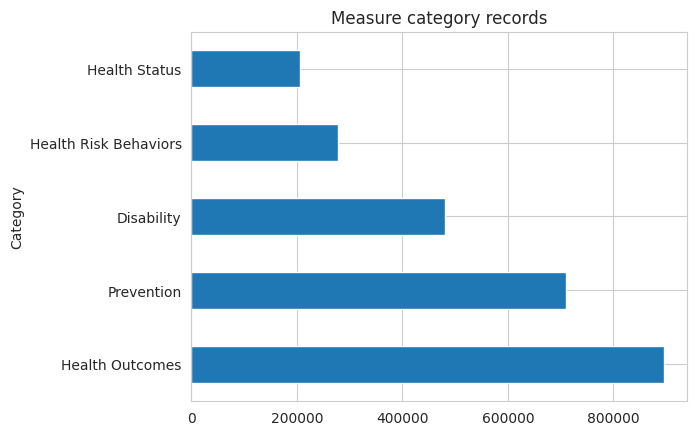

In [ ]:
places_income.Category.value_counts().plot(kind='barh')
plt.title("Measure category records");

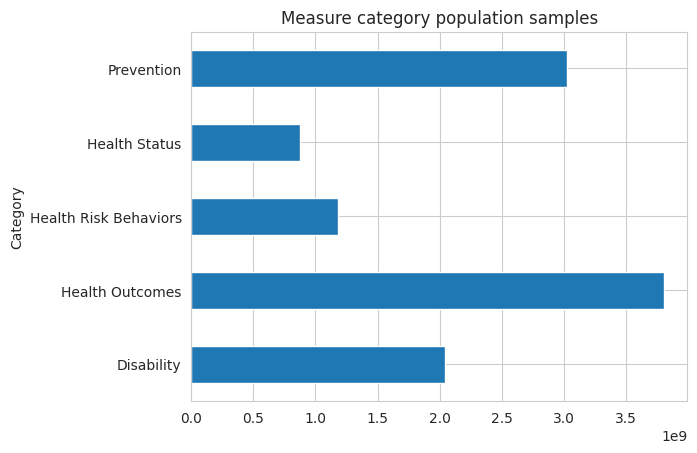

In [ ]:
# Population and category samples
places_income.groupby('Category', group_keys=True)['TotalPopulation'].sum().plot(kind='barh')
plt.title("Measure category population samples");

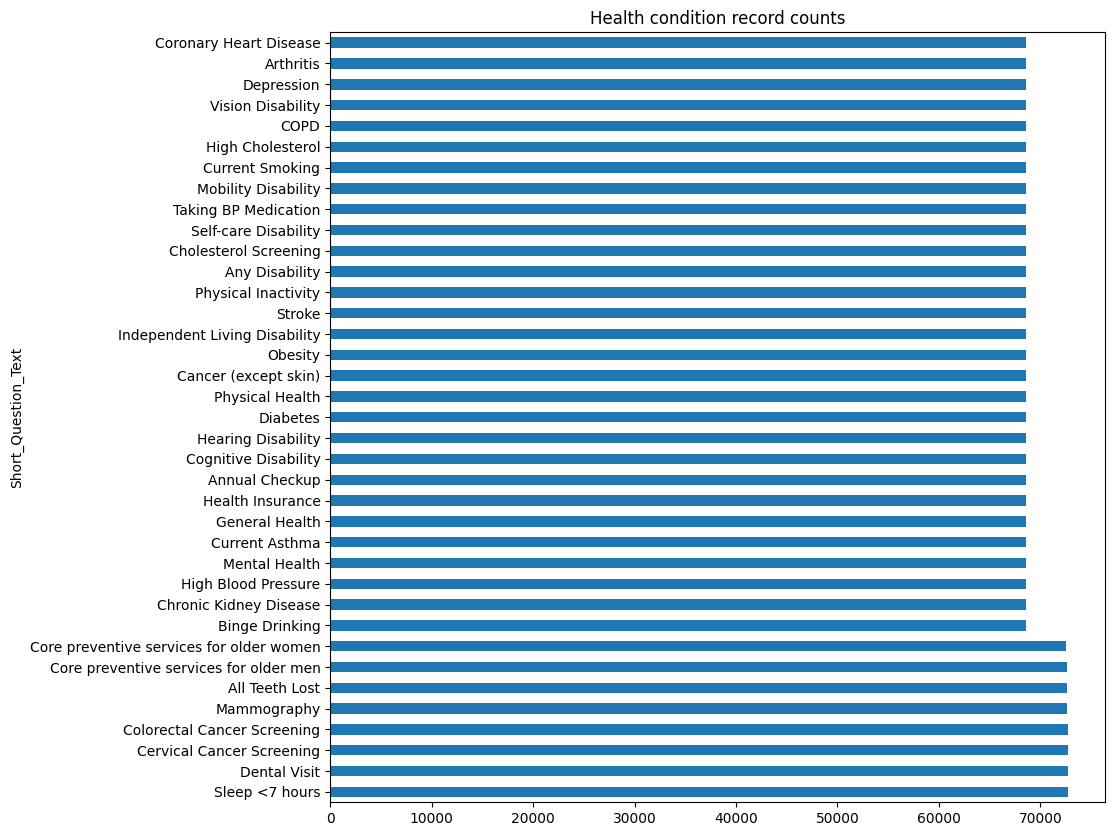

In [ ]:
# Plots
plt.figure(figsize=(10,10))
places_income.Short_Question_Text.value_counts().plot(kind='barh')
plt.title("Health condition record counts");

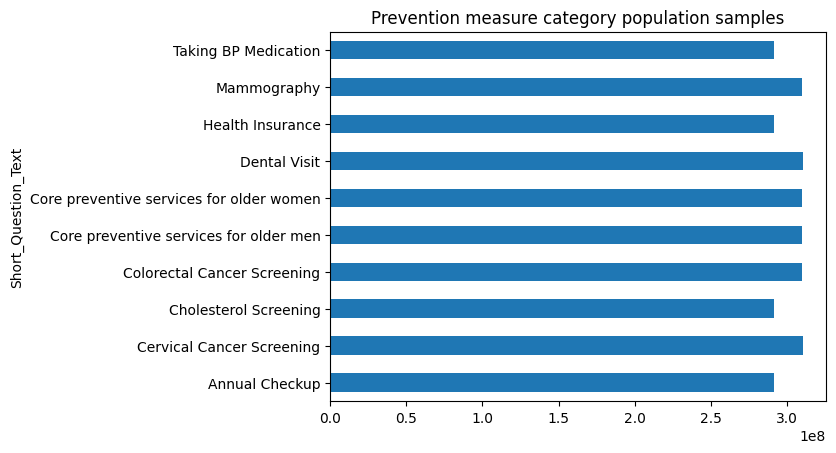

In [ ]:
# Population and measure samples, Prevention
places_income[places_income.Category=='Prevention'].groupby('Short_Question_Text', group_keys=True)['TotalPopulation'].sum().plot(kind='barh')
plt.title("Prevention measure category population samples");

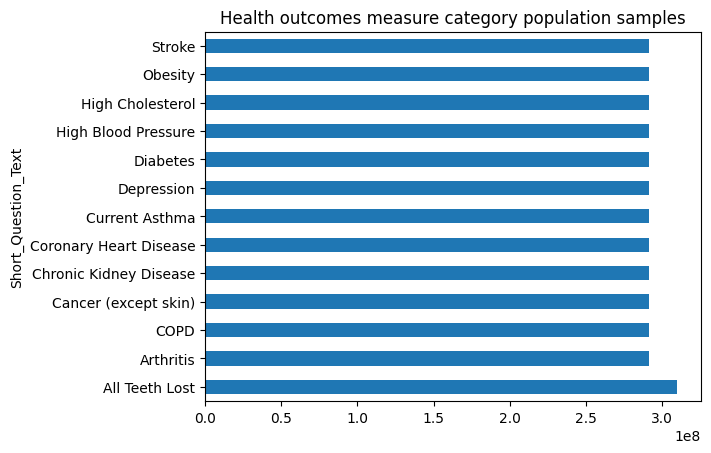

In [ ]:
# Health outcome measures
places_income[places_income.Category=='Health Outcomes'].groupby('Short_Question_Text', group_keys=True)['TotalPopulation'].sum().plot(kind='barh')
plt.title("Health outcomes measure category population samples");

In [ ]:
places_income['Short_Question_Text'].unique()

array(['Obesity', 'Stroke', 'Arthritis', 'Mammography', 'Depression',
       'Vision Disability', 'COPD', 'Dental Visit', 'High Cholesterol',
       'Current Smoking', 'Mobility Disability', 'Taking BP Medication',
       'Self-care Disability', 'Cholesterol Screening', 'Any Disability',
       'Colorectal Cancer Screening', 'All Teeth Lost',
       'Physical Inactivity', 'Core preventive services for older women',
       'Sleep <7 hours', 'Independent Living Disability',
       'Health Insurance', 'Cancer (except skin)',
       'Chronic Kidney Disease', 'High Blood Pressure', 'Mental Health',
       'Cervical Cancer Screening', 'Binge Drinking', 'General Health',
       'Current Asthma', 'Annual Checkup', 'Cognitive Disability',
       'Hearing Disability', 'Diabetes',
       'Core preventive services for older men', 'Physical Health',
       'Coronary Heart Disease'], dtype=object)

In [ ]:
# Few measure value checks
places_income[places_income['Short_Question_Text']=='Arthritis'].head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
314,2021,Colorado,Larimer,8069,Health Outcomes,20.6,18.2,23.0,5222,Arthritis,-105.031830,40.530557,284.0,"$30,740","$58,626","$76,194"
316,2021,Colorado,Larimer,8069,Health Outcomes,23.0,20.6,25.6,7876,Arthritis,-105.051148,40.397258,284.0,"$30,740","$58,626","$76,194"
379,2021,Idaho,Ada,16001,Health Outcomes,18.8,16.7,21.0,19450,Arthritis,-116.370102,43.655052,571.0,"$27,452","$55,210","$67,641"


In [ ]:
# Few measure value checks
places_income[places_income['Short_Question_Text']=='Depression'].head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
385,2021,Idaho,Valley,16085,Health Outcomes,21.9,18.1,26.0,4592,Depression,-115.904838,44.828781,882.0,"$25,785","$50,473","$60,100"
608,2021,Alabama,Etowah,1055,Health Outcomes,22.3,18.4,26.4,2684,Depression,-86.006446,34.029713,2293.0,"$20,204","$38,013","$47,259"
657,2021,Alabama,Jefferson,1073,Health Outcomes,18.9,16.2,21.8,3413,Depression,-86.874302,33.469855,669.0,"$26,906","$45,429","$59,095"


In [ ]:
# Few measure value checks
places_income[places_income['Short_Question_Text']=='Mammography'].head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
326,2020,Florida,Lee,12071,Prevention,77.0,74.0,79.9,2135,Mammography,-81.980383,26.547729,589.0,"$27,348","$47,439","$56,847"
625,2020,Alabama,Baldwin,1003,Prevention,79.4,75.1,82.9,3832,Mammography,-87.537869,30.291052,694.0,"$26,766","$50,221","$60,864"
671,2020,Alabama,Escambia,1053,Prevention,76.4,73.4,79.3,3632,Mammography,-87.280201,31.108759,2974.0,"$16,540","$30,687","$36,550"


In [ ]:
# Few measure value checks
places_income[places_income['Short_Question_Text']=='Obesity'].head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
0,2021,Alabama,Baldwin,1003,Health Outcomes,35.1,29.8,40.9,4487,Obesity,-87.877305,30.434116,694.0,"$26,766","$50,221","$60,864"
1,2021,Alabama,Chambers,1017,Health Outcomes,46.3,38.0,54.3,6669,Obesity,-85.460103,32.861286,2514.0,"$19,291","$32,402","$41,040"
2,2021,Alabama,Cleburne,1029,Health Outcomes,39.2,31.0,47.8,4202,Obesity,-85.562289,33.692583,2546.0,"$19,108","$38,019","$46,069"


In [ ]:
places_income[places_income['Short_Question_Text']=='Stroke'].head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
3,2021,Alabama,Covington,1039,Health Outcomes,4.2,3.8,4.6,3917,Stroke,-86.465163,31.346743,2235.0,"$20,391","$35,869","$43,822"
5,2021,Alabama,Houston,1069,Health Outcomes,3.6,3.2,4.1,3928,Stroke,-85.413282,31.253357,1460.0,"$23,316","$40,948","$52,214"
6,2021,Alabama,Jefferson,1073,Health Outcomes,6.0,5.3,6.8,3885,Stroke,-86.715486,33.553033,669.0,"$26,906","$45,429","$59,095"


In [ ]:
places_income[places_income['Short_Question_Text']=='Vision Disability'].head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
532,2021,Louisiana,Grant,22043,Disability,7.9,7.0,8.8,2438,Vision Disability,-92.496328,31.682962,2569.0,"$19,018","$39,654","$47,832"
710,2021,Alabama,Dale,1045,Disability,5.0,4.4,5.6,2067,Vision Disability,-85.471652,31.493193,1642.0,"$22,685","$44,889","$56,132"
826,2021,Alabama,Jefferson,1073,Disability,6.1,5.1,7.3,2539,Vision Disability,-86.720653,33.611925,669.0,"$26,906","$45,429","$59,095"


In [ ]:
places_income[places_income['Short_Question_Text']=='COPD'].head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
599,2021,Alabama,Jackson,1071,Health Outcomes,10.9,9.4,12.4,4272,COPD,-86.121738,34.625547,2215.0,"$20,486","$37,634","$47,380"
616,2021,Alabama,Elmore,1051,Health Outcomes,7.4,6.3,8.8,4757,COPD,-86.217576,32.705023,1315.0,"$23,856","$54,766","$65,479"
660,2021,Alabama,Dallas,1047,Health Outcomes,9.8,8.3,11.5,3791,COPD,-87.050895,32.448175,2887.0,"$17,245","$26,519","$38,063"


In [ ]:
places_income[places_income['Short_Question_Text']=='Dental Visit'].head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
600,2020,Alabama,Blount,1009,Prevention,56.1,53.4,58.8,3789,Dental Visit,-86.544069,33.999015,2150.0,"$20,730","$44,145","$52,996"
635,2020,Alabama,Elmore,1051,Prevention,62.6,59.2,65.9,7712,Dental Visit,-85.979495,32.516016,1315.0,"$23,856","$54,766","$65,479"
640,2020,Alabama,Colbert,1033,Prevention,51.9,47.9,56.0,3467,Dental Visit,-87.680220,34.769326,1937.0,"$21,572","$39,077","$50,924"


In [ ]:
places_income[places_income['Short_Question_Text']=='High Cholesterol'].head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
601,2021,Alabama,Dale,1045,Health Outcomes,40.0,35.2,45.1,4351,High Cholesterol,-85.644028,31.416713,1642.0,"$22,685","$44,889","$56,132"
658,2021,Alabama,Jefferson,1073,Health Outcomes,36.1,32.9,39.3,4950,High Cholesterol,-86.676003,33.597489,669.0,"$26,906","$45,429","$59,095"
686,2021,Alabama,Colbert,1033,Health Outcomes,38.7,33.7,43.9,4321,High Cholesterol,-87.666935,34.744225,1937.0,"$21,572","$39,077","$50,924"


In [ ]:
places_income[places_income['Short_Question_Text']=='Current Smoking'].head(3)

,Year,StateDesc,CountyName,CountyFIPS,Category,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Short_Question_Text,lng,lat,Rank,Per capita\nincome,Median\nhousehold\nincome,Median\nfamily\nincome
602,2021,Alabama,Baldwin,1003,Health Risk Behaviors,26.1,22.4,29.8,3325,Current Smoking,-87.768045,30.849361,694.0,"$26,766","$50,221","$60,864"
619,2021,Alabama,Blount,1009,Health Risk Behaviors,24.6,21.2,28.3,5269,Current Smoking,-86.391012,34.075817,2150.0,"$20,730","$44,145","$52,996"
673,2021,Alabama,Barbour,1005,Health Risk Behaviors,28.7,24.5,33.4,4303,Current Smoking,-85.568051,31.673141,2947.0,"$16,829","$32,911","$43,462"


In [ ]:
places_income.columns

Index(['Year', 'StateDesc', 'CountyName', 'CountyFIPS', 'Category',
       'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'TotalPopulation', 'Short_Question_Text', 'lng', 'lat', 'Rank',
       'Per capita\nincome', 'Median\nhousehold\nincome',
       'Median\nfamily\nincome'],
      dtype='object')

In [ ]:
places_income['Per capita\nincome']=places_income['Per capita\nincome'].str.strip('$').str.replace(',', '')

In [ ]:
places_income['Per capita\nincome']=places_income['Per capita\nincome'].astype(float)

In [ ]:
places_income['Per capita\nincome']

0          26766.0
1          19291.0
2          19108.0
3          20391.0
4          18494.0
            ...   
2570534    37577.0
2570535    28505.0
2570536    28505.0
2570537    22888.0
2570538    30941.0
Name: Per capita\nincome, Length: 2570539, dtype: float64

# Linear regression analysis using seaborn plots to see relationship between various measures and income.
## This will be done in tableau for enabling better end user interaction, instead of coding.

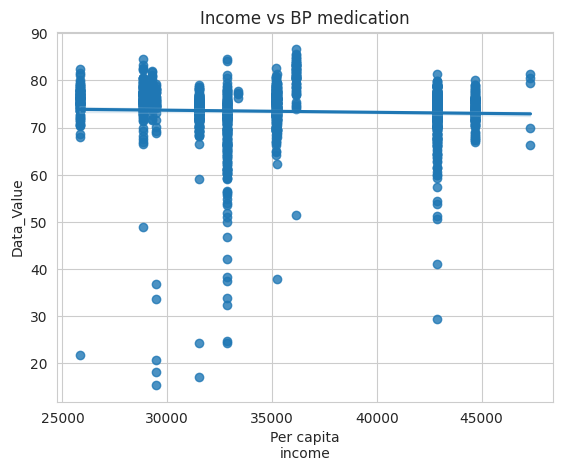

In [ ]:
sns.set_style('whitegrid')
sns.regplot(places_income[ (places_income['Short_Question_Text']=='Taking BP Medication') & (places_income['StateDesc']=='Massachusetts')], x='Per capita\nincome', y='Data_Value').set(title='Income vs BP medication');


##  With increase in income less people seem to have BP issues.

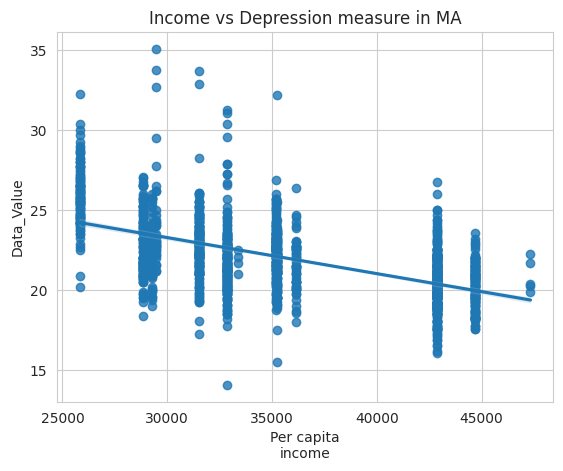

In [ ]:
sns.set_style('whitegrid')
sns.regplot(places_income[ (places_income['Short_Question_Text']=='Depression')& (places_income['StateDesc']=='Massachusetts')], x='Per capita\nincome', y='Data_Value').set(title='Income vs Depression measure in MA');


# Depression instances seem to reduce with better income in MA.

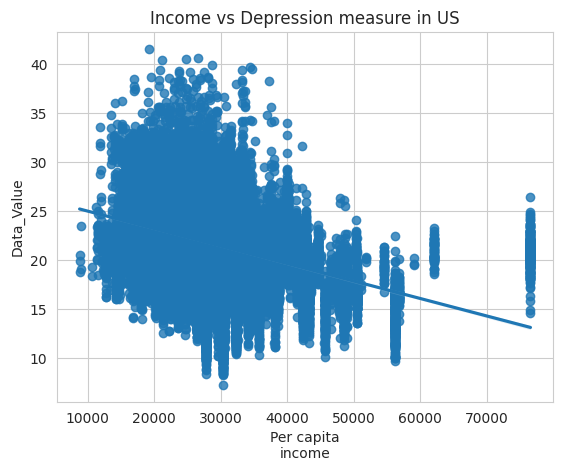

In [ ]:
sns.set_style('whitegrid')
sns.regplot(places_income[places_income['Short_Question_Text']=='Depression'], x='Per capita\nincome', y='Data_Value').set(title='Income vs Depression measure in US');


## Depression instances seem to reduce with better income in US.

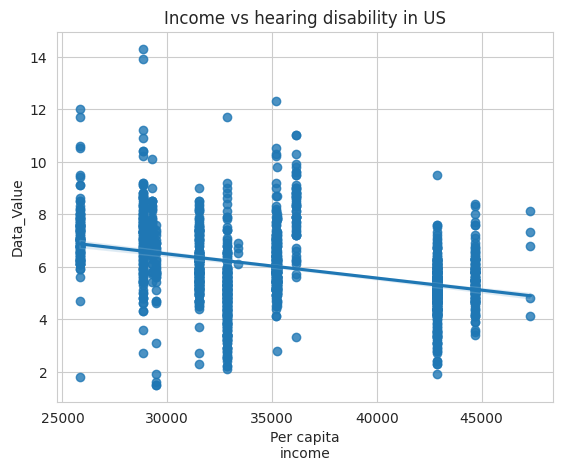

In [ ]:
sns.set_style('whitegrid')
sns.regplot(places_income[(places_income['Short_Question_Text']=='Hearing Disability') & (places_income['StateDesc']=='Massachusetts')], x='Per capita\nincome', y='Data_Value').set(title='Income vs hearing disability in US');


## Hearing disability instances seem to reduce with better income in MA

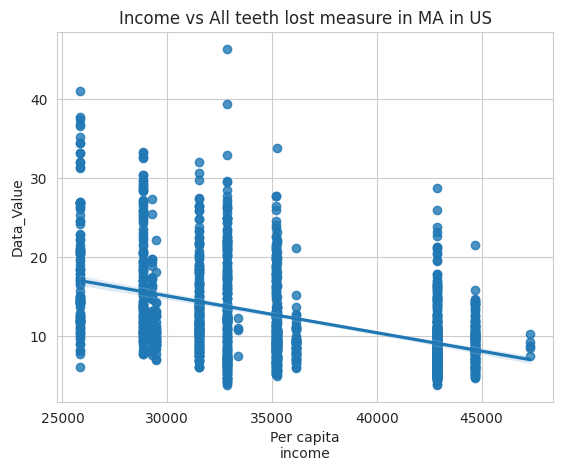

In [ ]:
sns.set_style('whitegrid')
sns.regplot(places_income[(places_income['Short_Question_Text']=='All Teeth Lost') & (places_income['StateDesc']=='Massachusetts')], x='Per capita\nincome', y='Data_Value').set(title='Income vs All teeth lost measure in MA in US');


## Bad health conditions like 'All teeth lost" seem to reduce with better income.

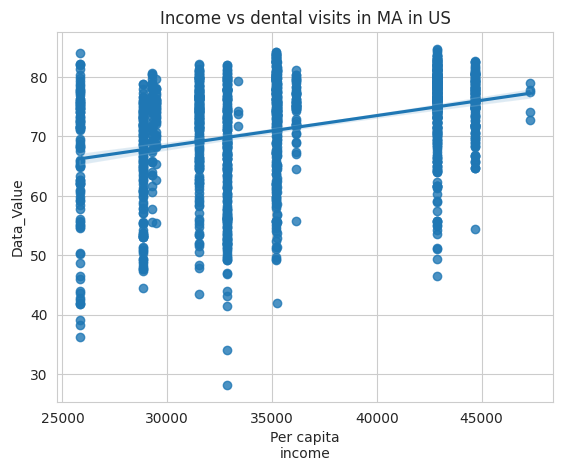

In [ ]:
sns.set_style('whitegrid')
sns.regplot(places_income[(places_income['Short_Question_Text']=='Dental Visit') & (places_income['StateDesc']=='Massachusetts')], x='Per capita\nincome', y='Data_Value').set(title='Income vs dental visits in MA in US');


## Preventive care "dental visit" increases with better income in MA.

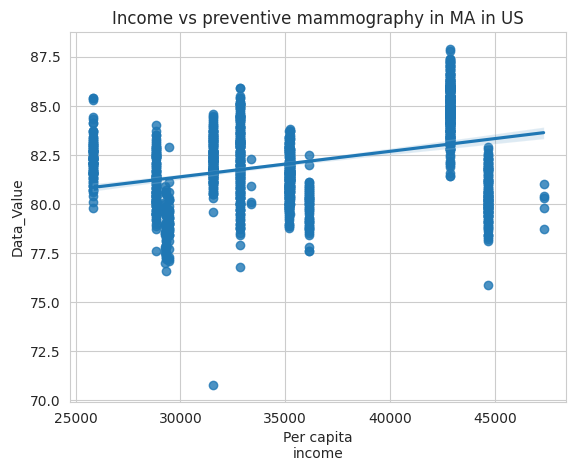

In [ ]:
sns.set_style('whitegrid')
sns.regplot(places_income[(places_income['Short_Question_Text']=='Mammography') & (places_income['StateDesc']=='Massachusetts')], x='Per capita\nincome', y='Data_Value').set(title='Income vs preventive mammography in MA in US');


## Preventive care "Mammography" increases with better income in MA.

## Observation summary

* Income has positive relationship with healthcare a person can afford.
* Cities should focus on enabling more preventive healthcare and ensuring people should have health insurence.
* Educating patients to maintain a healthy life style is important. As bad lifestyle leads to chronic diseases and finally bad health outcomes.

## Tool usability by end users

* To ensure targetted consumers of this data are able to use the data fruitfully user friendly tableau dashboard has been created.

In [73]:
#!jupyter nbconvert  '/content/CDC_PLACES_EAI6060project_MalaChaurasia.ipynb' --to html